In [13]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/c/Users/kz/Pictures/tbg3/"

In [14]:
import matplotlib.patheffects as PathEffects
inverse_lattice = 6/180 * np.pi

latticeconstant = 1 / inverse_lattice / np.sqrt(3)
extent = 15

def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

color1 = 0x4dab2f
color2 = 0xdecd2b
color3 = 0xf78026
color4 = 0xfd58f7
color5 = 0x9c78fa
color6 = 0x4db2f1


In [15]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

ax = None

In [16]:
R = 1

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))

def adddowntri(xy, name, **kwargs):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=np.pi, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def adduptri(xy, name, **kwargs):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=0, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def addarrow(downxy, upxy):
    downxy = trilatloc(downxy, "down")
    upxy = trilatloc(upxy, "up")
    
    ax.add_patch(mpatches.FancyArrow(upxy[0], upxy[1], downxy[0] - upxy[0], downxy[1] - upxy[1], color="black", width=0.10, head_width=0.5, head_length=0.5, length_includes_head=True))  

In [18]:
height = 6
width = 6

plt.rcParams["mathtext.fontset"] = "dejavuserif"

def drawstate(A, B, J4, name, wf="tri", annotate_j4=[], annotate_wf=None, doubleA=[], holes=([],[])):
    annotate_j4 = []
    annotate_wf = None
    import matplotlib.collections as mc
    if wf == "tri":
        for index, pair in enumerate(A):
            i, c = pair
            adduptri(i, index, facecolor=to_rgba(c, 1))
        for index, pair in enumerate(B):
            i, c = pair
            adddowntri(i, index, facecolor=to_rgba(c, 1))
    else:
        for i, c in A:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/5, facecolor=to_rgba(c, 1), ec='k'))
            if i in doubleA:
                ax.text(xy[0], xy[1], "↑↓", fontfamily="serif", fontsize=15, zorder=3, horizontalalignment='center', verticalalignment='center')
                
        for i, c in B:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/5, facecolor=to_rgba(c, 1), ec='k'))
            
        for i in holes[0]:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
        
                
        for i in holes[1]:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
            
    if annotate_wf is not None:
        xy = trilatloc(annotate_wf, "up")
        collection = mc.StarPolygonCollection(
            numsides=5, # a pentagon
            rotation=0,
            sizes=(1000,),
            facecolors="black",
            edgecolors="black",
            linewidths=(1,),
            offsets=xy,
            transOffset=ax.transData,
            zorder=3
            )
        ax.add_collection(collection)
        
    
    ind = 0
    for i, j in J4:
        Axy = trilatloc(A[i], "up")
        Bxy = trilatloc(B[j], "down")
        j4bondlineabs(Axy, Bxy, 4, R)
        # ax.plot([Axy[0], Bxy[0]], [Axy[1], Bxy[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)
        if ind in annotate_j4:
            midpoint = ((Axy[0] + Bxy[0])/2, (Axy[1] + Bxy[1])/2)
            ax.add_patch(mpatches.Circle((midpoint[0], midpoint[1]), 0.5, lw=5, edgecolor="#1f8915", facecolor="white", fill=True, zorder=2))
            ax.text(midpoint[0], midpoint[1], "J$_4$", fontfamily="serif", fontsize=34, zorder=3, horizontalalignment='center', verticalalignment='center')
            
        ind += 1

    ax.set_xlim([0, 16])
    ax.set_ylim([0, 16*5/8])
    ax.axis("off")
    
    plt.tight_layout()
    
    if name is not None:
        plt.savefig(base_dir + name + ".png", dpi=100)
        plt.savefig(base_dir + name + ".svg", dpi=100)

def draw_hexalattice(color=None, ls="-"):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(height + 1):
        xlen = width + 1
        xrange = (0, width + 1)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
                
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
            
            #if x < xrange[1] - 1:
                #HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, ls=ls, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None, ls="-"):
    if color is None:
        color = "black"
    for x in range(1, width):
        for y in range(1, height):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color, ls=ls))
    xy = trilatloc((0, 0), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)
    xy = trilatloc((width - 1, height - 1), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)

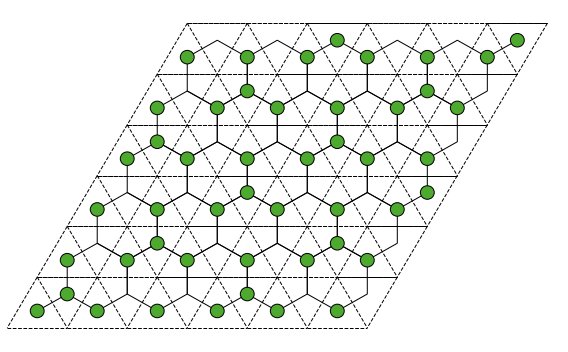

In [20]:
A = []
B = []
for x, y in [(-1, -1), (2, -1), (5, -1), (0, 0), (3, 0), (1, 1), (4, 1), (-1, 2), (2, 2), (5, 2), (0, 3), (3, 3), (6, 3), (1, 4), (4, 4), (-1, 5), (2, 5), (5, 5)]:
	A += [((x, y+1), color1), ((x+1, y+1), color1), ((x, y+2), color1)]
	B += [((x, y+1), color1)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "1", wf="hexa")

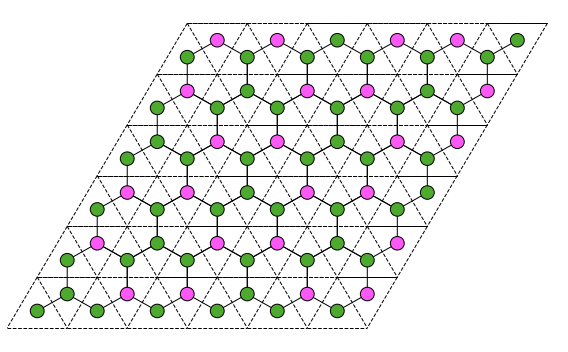

In [21]:
A = []
B = []
for x, y in [(-1, -1), (2, -1), (5, -1), (0, 0), (3, 0), (1, 1), (4, 1), (-1, 2), (2, 2), (5, 2), (0, 3), (3, 3), (6, 3), (1, 4), (4, 4), (-1, 5), (2, 5), (5, 5)]:
	A += [((x, y+1), color1), ((x+1, y+1), color1), ((x, y+2), color1)]
	B += [((x, y+1), color1)]

	B += [((x+1, y+1), color4)]
	B += [((x, y+2), color4)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "1.2", wf="hexa")

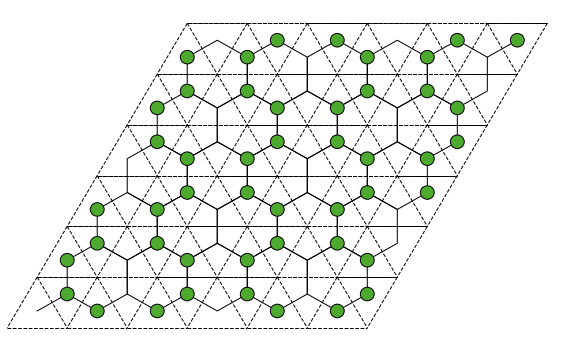

In [22]:
A = []
B = []
for x, y in [(-1, -1), (2, -1), (5, -1), (0, 0), (3, 0), (1, 1), (4, 1), (-1, 2), (2, 2), (5, 2), (0, 3), (3, 3), (6, 3), (1, 4), (4, 4), (-1, 5), (2, 5), (5, 5)]:
	A += [((x+1, y+1), color1), ((x, y+2), color1)]
	B += [((x, y+1), color1), ((x, y+2), color1)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "2", wf="hexa")

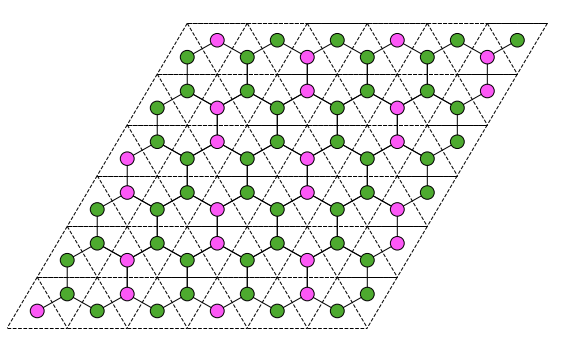

In [23]:
A = []
B = []
for x, y in [(-1, -1), (2, -1), (5, -1), (0, 0), (3, 0), (1, 1), (4, 1), (-1, 2), (2, 2), (5, 2), (0, 3), (3, 3), (6, 3), (1, 4), (4, 4), (-1, 5), (2, 5), (5, 5)]:
	A += [((x+1, y+1), color1), ((x, y+2), color1)]
	B += [((x, y+1), color1), ((x, y+2), color1)]

	A += [((x, y+1), color4)]
	B += [((x+1, y+1), color4)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "2.2", wf="hexa")

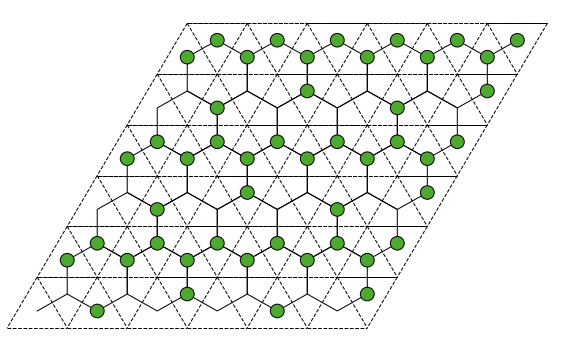

In [24]:
A = []
B = []
for x, y in [(0, 0), (3, 0), (0, 2), (3, 2), (0, 4), (3, 4)]:
	A += [((x+1, y+1), color1), ((x, y+2), color1), ((x+1, y+2), color1), ((x+2, y+2), color1)]
	B += [((x+2, y+1), color1), ((x, y+2), color1), ((x+1, y+2), color1), ((x+2, y+2), color1)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "3", wf="hexa")

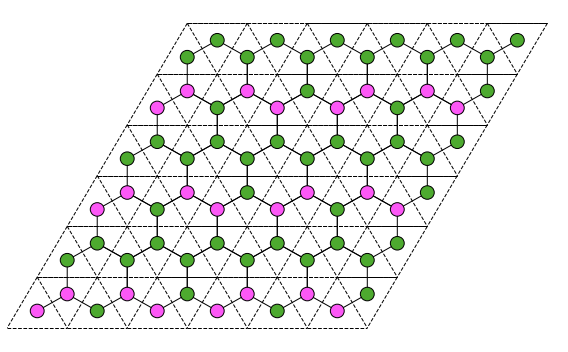

In [25]:
A = []
B = []
for x, y in [(0, 0), (3, 0), (0, 2), (3, 2), (0, 4), (3, 4)]:
	A += [((x+1, y+1), color1), ((x, y+2), color1), ((x+1, y+2), color1), ((x+2, y+2), color1)]
	B += [((x+2, y+1), color1), ((x, y+2), color1), ((x+1, y+2), color1), ((x+2, y+2), color1)]

	A += [((x, y+1), color4), ((x+2, y+1), color4)]
	B += [((x+1, y+1), color4), ((x, y+1), color4)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "3.2", wf="hexa")

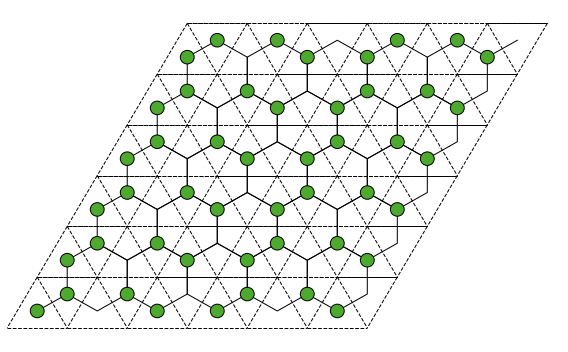

In [26]:
A = []
B = []
for x, y in [(0, 0), (3, 0), (0, 2), (3, 2), (0, 4), (3, 4)]:
	A += [((x, y+1), color1), ((x, y+2), color1), ((x+2, y+1), color1), ((x+2, y+2), color1)]
	B += [((x, y+1), color1), ((x, y+2), color1), ((x+1, y+1), color1), ((x+1, y+2), color1)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "4", wf="hexa")

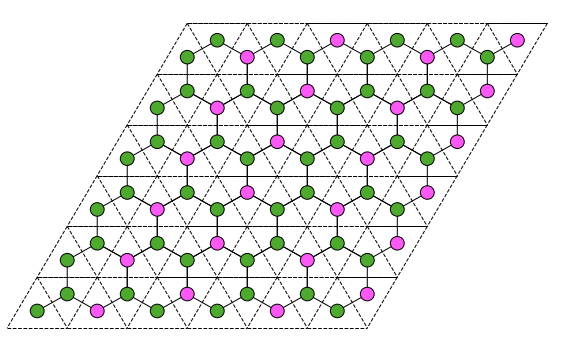

In [27]:
A = []
B = []
for x, y in [(0, 0), (3, 0), (0, 2), (3, 2), (0, 4), (3, 4)]:
	A += [((x, y+1), color1), ((x, y+2), color1), ((x+2, y+1), color1), ((x+2, y+2), color1)]
	B += [((x, y+1), color1), ((x, y+2), color1), ((x+1, y+1), color1), ((x+1, y+2), color1)]

	A += [((x+1, y+1), color4), ((x+1, y+2), color4)]
	B += [((x+2, y+1), color4), ((x+2, y+2), color4)]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]
B = [(i,c) for (i,c) in B if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "4.2", wf="hexa")

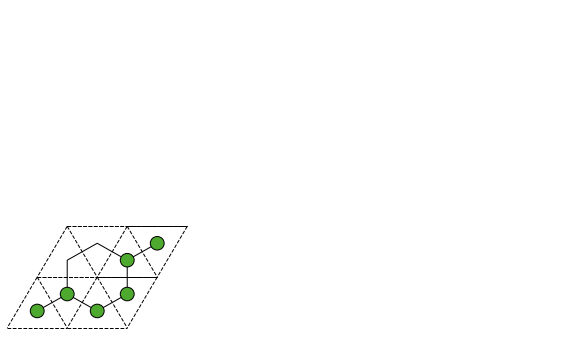

In [28]:
height = 2
width = 2

A = [((0, 1), color1), ((1, 1), color1), ((1, 2), color1)]
B = [((0, 1), color1), ((1, 1), color1), ((1, 2), color1)]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "x1", wf="hexa")

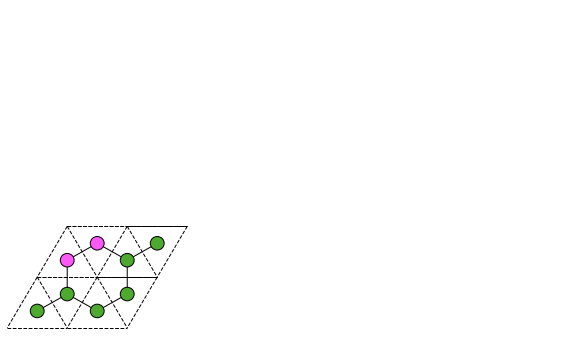

In [31]:
A = [((0, 1), color1), ((1, 1), color1), ((1, 2), color1), ((0, 2), color4)]
B = [((0, 1), color1), ((1, 1), color1), ((1, 2), color1), ((0, 2), color4)]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "x2", wf="hexa")

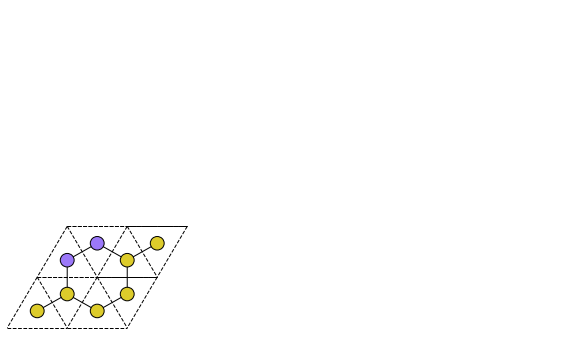

In [32]:
A = [((0, 1), color2), ((1, 1), color2), ((1, 2), color2), ((0, 2), color5)]
B = [((0, 1), color2), ((1, 1), color2), ((1, 2), color2), ((0, 2), color5)]

fig, ax = plt.subplots(1, 1, figsize=[8, 5])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "x3", wf="hexa")